# Scenario analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(columns="Unnamed: 0")
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

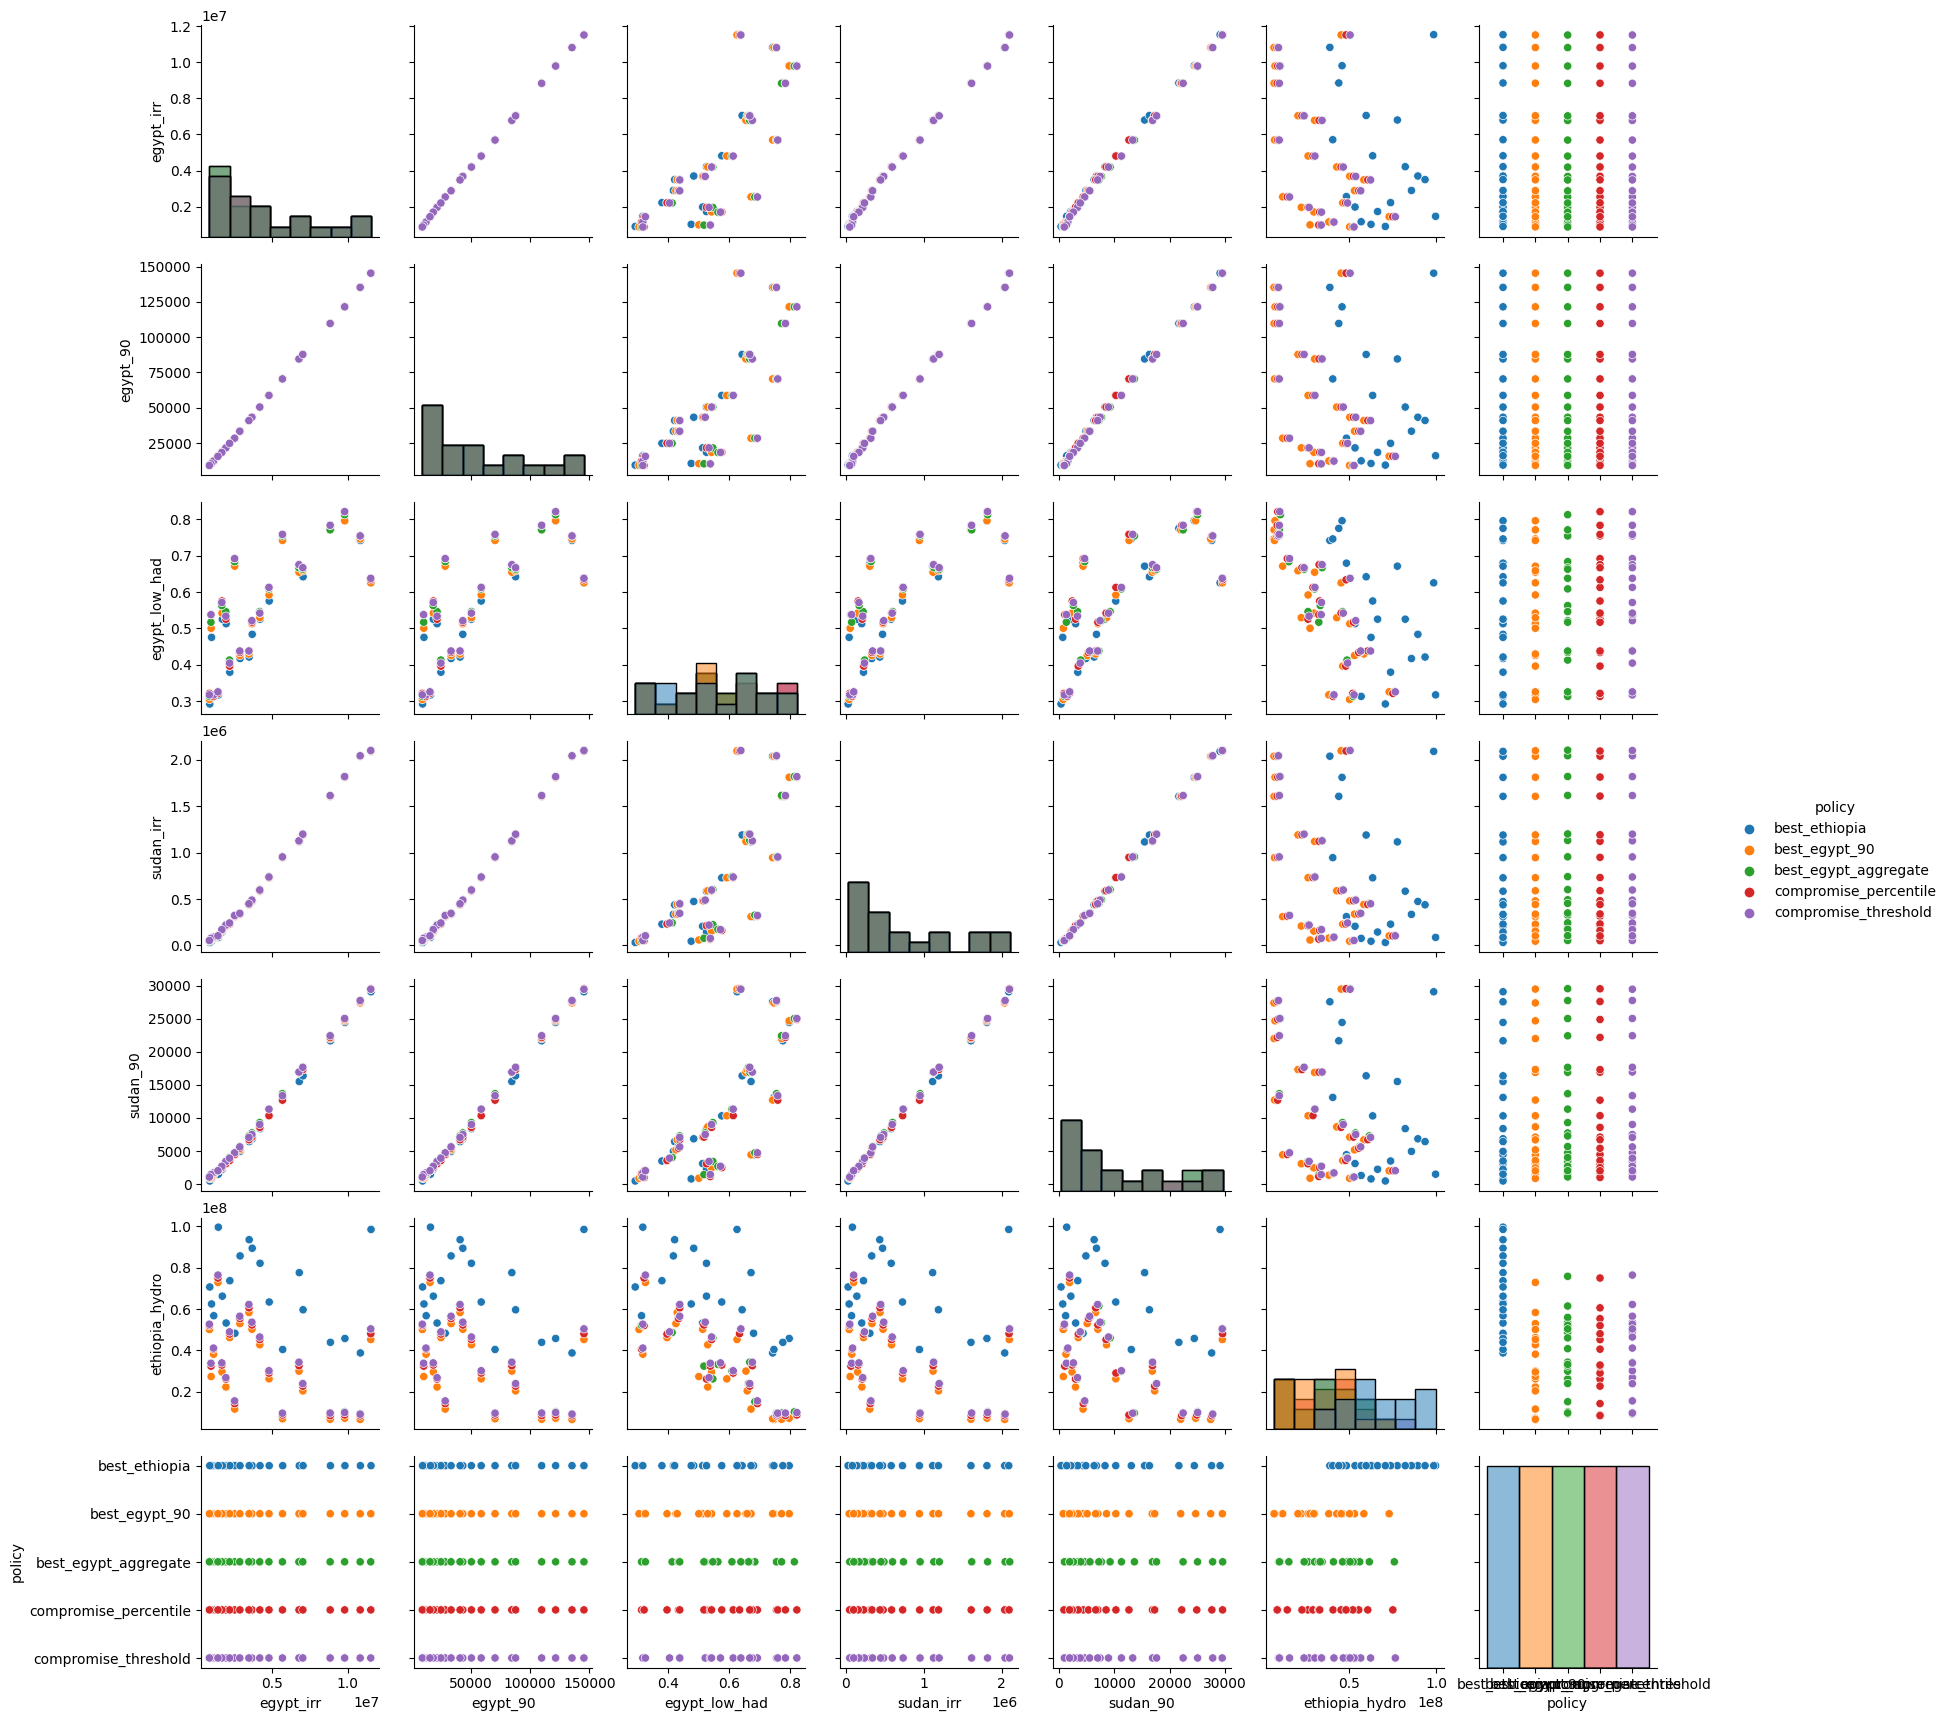

In [4]:
policies = experiments['policy']

data = outcomes
data['policy'] = policies

sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist')
plt.show()

In [8]:
experiments.iloc[:,:7]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate
0,1.391560,0.800548,1.066397,0.896266,0.507308,1.153201,0.157830
1,1.245841,1.249787,0.793241,0.765091,1.281467,1.006575,0.285049
2,1.114482,1.206358,1.110637,0.978912,0.667396,1.064063,0.222201
3,0.533226,0.835494,1.216618,0.853811,0.580543,0.995622,0.174604
4,1.012121,1.103404,1.470798,1.085043,1.043394,0.849567,0.248279
...,...,...,...,...,...,...,...
95,0.946212,1.013865,0.503930,1.031975,0.826107,0.947127,0.109756
96,0.835106,0.787154,1.390609,0.831675,1.400261,0.796913,0.276748
97,1.416485,0.983664,0.819442,1.228856,0.931771,0.952812,0.139344
98,0.625398,1.176179,0.650659,1.221240,1.452005,0.894706,0.290179


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


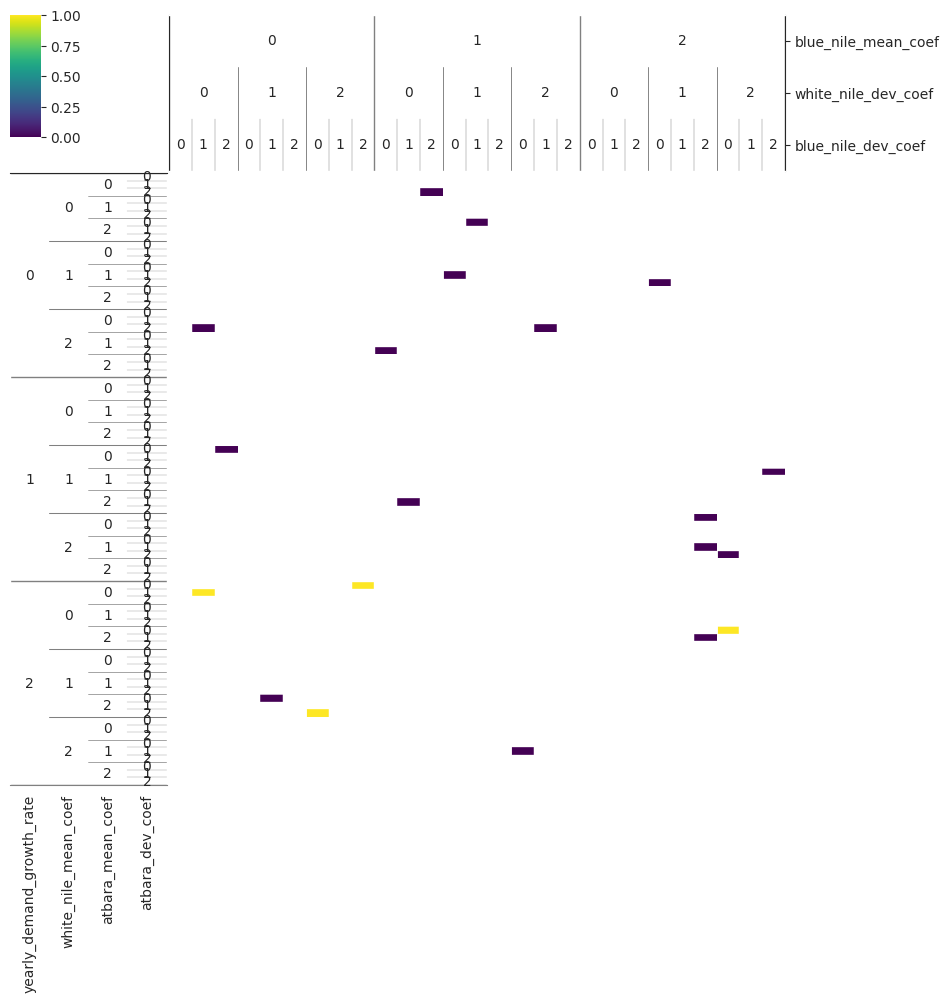

In [9]:
from ema_workbench.analysis import dimensional_stacking

x = experiments.iloc[:,:7]
y = outcomes["egypt_irr"] > np.percentile(outcomes["egypt_irr"],80)
dimensional_stacking.create_pivot_plot(x, y, 4, nbins=3)
plt.show()

In [14]:
experiments

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate,v0,v1,v2,...,v157,v158,v159,v160,v161,v162,v163,scenario,policy,model
0,0.766971,0.949673,0.565512,0.813939,1.371183,0.916634,0.146237,0.024197,0.769617,0.922287,...,0.553373,0.380468,0.861627,0.875497,0.855204,0.184055,0.735560,0,best_egypt,NileProblem
1,1.155225,0.895892,0.683048,1.038282,1.066811,1.056756,0.190936,0.024197,0.769617,0.922287,...,0.553373,0.380468,0.861627,0.875497,0.855204,0.184055,0.735560,1,best_egypt,NileProblem
2,1.058897,1.179011,0.846483,0.967432,0.640020,0.939342,0.252578,0.024197,0.769617,0.922287,...,0.553373,0.380468,0.861627,0.875497,0.855204,0.184055,0.735560,2,best_egypt,NileProblem
3,1.289217,1.016686,0.744987,0.868624,0.943766,1.130762,0.172993,0.024197,0.769617,0.922287,...,0.553373,0.380468,0.861627,0.875497,0.855204,0.184055,0.735560,3,best_egypt,NileProblem
4,1.367715,1.101461,1.144014,0.997627,1.290226,0.865253,0.376654,0.024197,0.769617,0.922287,...,0.553373,0.380468,0.861627,0.875497,0.855204,0.184055,0.735560,4,best_egypt,NileProblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.409113,1.084441,0.952496,1.054007,1.163438,1.072527,0.075581,0.017480,0.508613,0.378588,...,0.573198,0.441752,0.429953,0.872579,0.488856,0.951078,0.757885,15,diversity,NileProblem
96,0.866716,0.825992,1.237567,1.145410,1.468885,1.191103,0.031603,0.017480,0.508613,0.378588,...,0.573198,0.441752,0.429953,0.872579,0.488856,0.951078,0.757885,16,diversity,NileProblem
97,0.847356,0.967176,1.291736,1.106667,0.766921,0.801430,0.049210,0.017480,0.508613,0.378588,...,0.573198,0.441752,0.429953,0.872579,0.488856,0.951078,0.757885,17,diversity,NileProblem
98,0.518216,0.999107,1.322295,1.080125,1.419524,0.984821,0.001536,0.017480,0.508613,0.378588,...,0.573198,0.441752,0.429953,0.872579,0.488856,0.951078,0.757885,18,diversity,NileProblem
